In [1]:
#Necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from typing import Type
import statsmodels.api as sm
import statsmodels.regression.linear_model as sm_lr


# Customer dataset

The customer dataset includes basic customer information and activity logs:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.
* Yearly Amount Spent: How much the customr has spent.

## 1. Read the dataset as DataFrame and provide detailed numerical and graphical summaries. 

       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462  


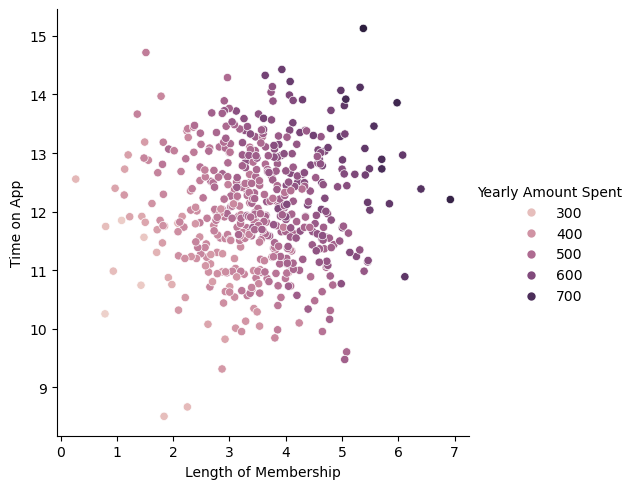

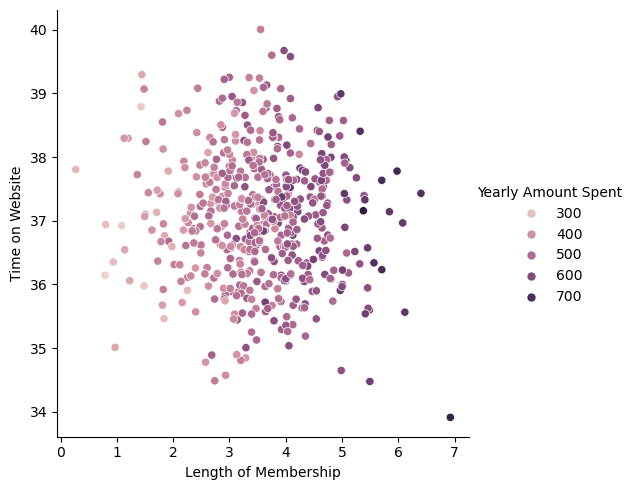

In [2]:
# Load the dataset
customer = pd.read_csv("Ecommerce Customers.csv")

# Display
print(customer.describe())

# Create a scatter plot to visualize
sns.relplot(x='Length of Membership', y='Time on App', hue='Yearly Amount Spent', data=customer)
sns.relplot(x='Length of Membership', y='Time on Website', hue='Yearly Amount Spent', data=customer)



## 2. Conduct a linear regression model to predict Length of Membership using three variables, Avg. Session Length, Time on App, and Time on Website. Here, use 5-fold CV (simply training and test sets) and evaluate the performances. For this question, use scikit-learn.

In [4]:
# Define the features (independent variables) for predicting 'Length of Membership'
membership_x = customer.loc[:,['Avg. Session Length', 'Time on App', 'Time on Website']]
# Define the target variable (dependent variable) as 'Length of Membership'
membership_y = customer.loc[:, customer.columns == 'Length of Membership']

# Train-test split 
membershipx_train, membershipx_test, membershipy_train, membershipy_test = train_test_split(membership_x, membership_y, test_size=0.25, random_state=1)

# Create the linear regression model
lm_membership = LinearRegression()
# Fit the model on the training data 
lm_membership.fit(membershipx_train,membershipy_train)
#Make predictions on the test data using the trained model
membershipy_pred = lm_membership.predict(membershipx_test)

# Perform 5-fold cross-validation to evaluate model performance
cv_customer1 = cross_val_score(lm_membership, membershipx_train, membershipy_train, cv=5)

# Print the average cross-validation score
print(cv_customer1)
print(cv_customer1.mean())


[-0.00670095 -0.01239108  0.00907637 -0.00166293 -0.01089758]
-0.004515232587518491


## 3. Conduct a linear regression model to predict Yearly Amount Spent using three variables, Avg. Session Length, Time on App, and Time on Website. Here, use 5-fold CV (simply training and test sets) and evaluate the performances. For this question, use scikit-learn.

In [5]:
# Define the features (independent variables) for predicting 'Yearly Amount Spent'
year_x = customer.loc[:,['Avg. Session Length', 'Time on App', 'Time on Website']]
# Define the target variable (dependent variable) as 'Yearly Amount Spent'
year_y = customer.loc[:, customer.columns == 'Yearly Amount Spent']

# Train-test split 
yearx_train, yearx_test, yeary_train, yeary_test = train_test_split(year_x, year_y, test_size=0.25, random_state=1)

# Create the linear regression model
lm_year = LinearRegression()
# Fit the model on the training data 
lm_year.fit(yearx_train, yeary_train)
# Make predictions on the test data using the trained model
yeary_pred = lm_year.predict(yearx_test)

# Perform 5-fold cross-validation to evaluate model performance
cv_customer2 = cross_val_score(lm_year, yearx_train, yeary_train, cv=5)

# Print the average cross-validation score
print(cv_customer2)
print(cv_customer2.mean())


[0.30540074 0.2777131  0.43779266 0.38637881 0.40190572]
0.3618382054896774


## 4. Compare the performances of two models in Q2 and Q3. That is, would it be more appropriate to use the three explanatory variables to predict either Length of Membership or Yearly Amount Spent? Which performance metric would you use to answer this question?

In [6]:
# I will use RMSE for this question 

#print RMSE
print('Membership RMSE :', np.sqrt(metrics.mean_squared_error(membershipy_test, membershipy_pred)))
print('Year spent RMSE :', np.sqrt(metrics.mean_squared_error(yeary_test, yeary_pred)))

Membership RMSE : 1.0165907491060682
Year spent RMSE : 63.26563831988401


## 5. We are interested in whether the customers in certain region differ. Create a region variable using the dictionary below.

We have the dictionary that matches the two letter state abbreviations and their regions. 

* N - North East 
* W - West 
* M - Mid West 
* S - South 
* O - Other

In [7]:
states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}


customer['states'] = customer['Address'].str.extract(r'([A-Z]{2})')# Extracts the last 2 uppercase letters (state abbreviation)

# Now map the region from the extracted state abbreviation
customer['region'] = customer['states'].map(states)

# Check the result
print(customer[['states', 'region']])



    states region
0       MI      W
1       CA      W
2       DC      N
3       OH      M
4       PR      O
..     ...    ...
495     UT      W
496     CA      W
497     TN      S
498     TX      S
499     OR      W

[500 rows x 2 columns]


## 6. Draw a scatterplot of Length of Membership and Yearly Amount Spent whose points are colored by the region.

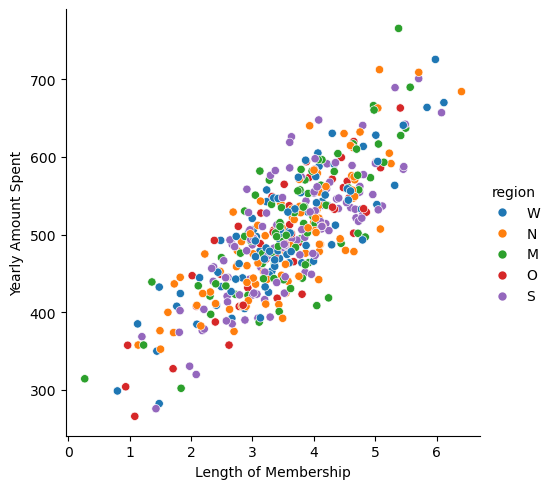

In [8]:
# Create a scatter plot to visualize the relationship
sns.relplot(x='Length of Membership', y='Yearly Amount Spent', hue='region', data=customer)


## 7. Conduct a linear regression model that predicts Lengths of Membership using three variables, Avg. Session Length, Time on App, and Time on Website, for five regions, respectively. Here, use 5-fold CV (simply training and test sets) and evaluate the performances. For this question, use statsmodels. 

In [9]:
from sklearn.base import BaseEstimator, RegressorMixin


# Define a custom Statsmodels OLS model wrapper for sklearn compatibility
class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        X = sm.add_constant(X)
        self.model = sm.OLS(y, X).fit()
        return self

    def predict(self, X):
        X = sm.add_constant(X)
        return self.model.predict(X)

    def score(self, X, y):
        X = sm.add_constant(X)
        return self.model.rsquared

# Initialize the custom Statsmodels OLS model
ols_model = StatsmodelsOLS()

regions = customer['region'].unique()

# Iterate through each region and train a model
for region in regions:
    # Filter the dataset by region
    region_data = customer[customer['region'] == region]

    # If the region has enough data, split into train and test
    if len(region_data) > 1:  # Ensuring there is enough data
        X_region = region_data.loc[:, ['Avg. Session Length', 'Time on App', 'Time on Website']]
        y_region = region_data['Length of Membership']

        # Perform cross-validation using cross_val_score
        cv_scores = cross_val_score(ols_model, X_region, y_region, cv=5, scoring='r2')

        # Calculate the mean of the R^2 scores from cross-validation
        mean_cv_score = np.mean(cv_scores)

        # Fit the final model to the entire dataset
        final_model = ols_model.fit(X_region, y_region)
        final_R2 = final_model.score(X_region, y_region)

        print(f"Region: {region} | Final R2: {final_R2:.4f} | Mean CV R2: {mean_cv_score:.4f}")
    else:
        print(f"Region: {region} | Insufficient data for modeling.")

Region: W | Final R2: 0.0477 | Mean CV R2: -0.2925
Region: N | Final R2: 0.0161 | Mean CV R2: -0.1137
Region: M | Final R2: 0.0195 | Mean CV R2: -0.1725
Region: O | Final R2: 0.0193 | Mean CV R2: -0.3299
Region: S | Final R2: 0.0019 | Mean CV R2: -0.1645
Region: nan | Insufficient data for modeling.


## 8. Create the diagnosic plots used in the lecture note for the linear regression models of North East region. Interpret them.

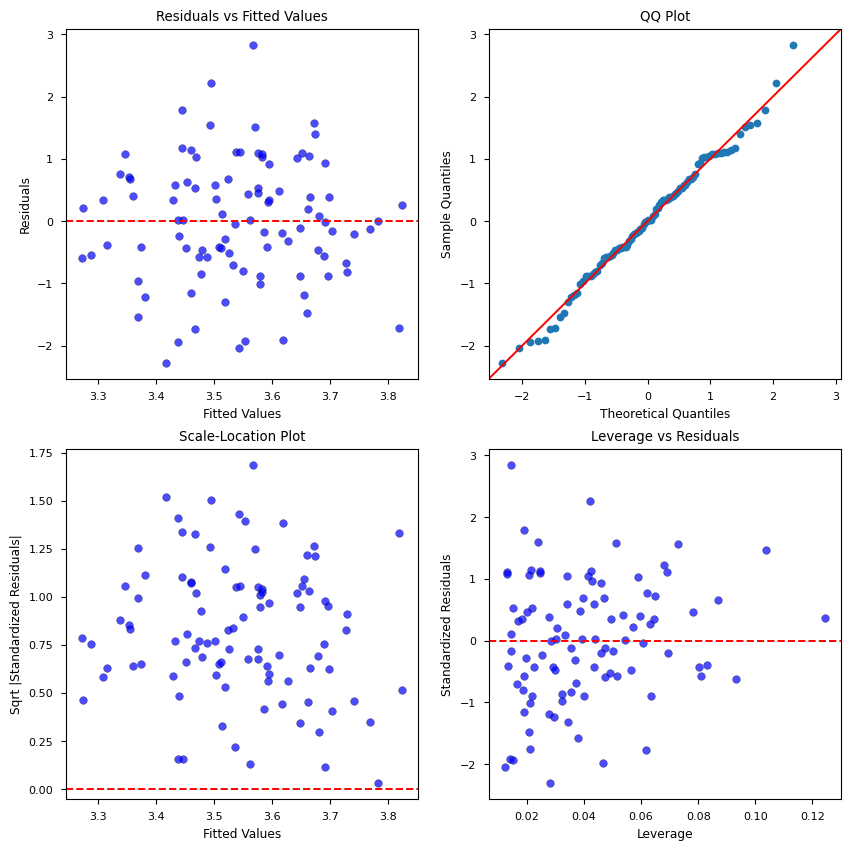

(              Variable          VIF
 0                const  2777.472913
 1  Avg. Session Length     1.006832
 2          Time on App     1.006575
 3      Time on Website     1.000344,
 <Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: title={'center': 'Residuals vs Fitted Values'}, xlabel='Fitted Values', ylabel='Residuals'>,
         <Axes: title={'center': 'QQ Plot'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>],
        [<Axes: title={'center': 'Scale-Location Plot'}, xlabel='Fitted Values', ylabel='Sqrt |Standardized Residuals|'>,
         <Axes: title={'center': 'Leverage vs Residuals'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [10]:
class LinearRegDiagnostic:
    def __init__(self, results: Type[sm.regression.linear_model.RegressionResultsWrapper]) -> None:
        # Ensure the results are of the correct type
        if not isinstance(results, sm.regression.linear_model.RegressionResultsWrapper):
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        # Unwrap the results
        self.results = results

        # True values, predicted values, and model information
        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        # Residuals and influence metrics
        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def residual_plot(self, ax):
        ax.scatter(self.y_predict, self.residual, color="blue", edgecolors="black", alpha=0.7)
        ax.axhline(0, color='red', linestyle='--')
        ax.set_xlabel('Fitted Values')
        ax.set_ylabel('Residuals')
        ax.set_title('Residuals vs Fitted Values')

    def qq_plot(self, ax):
        sm.qqplot(self.residual, line ='45', ax=ax)
        ax.set_title('QQ Plot')

    def scale_location_plot(self, ax):
        # Scale-location plot (Square root of standardized residuals vs fitted values)
        sqrt_residual = np.sqrt(np.abs(self.residual_norm))
        ax.scatter(self.y_predict, sqrt_residual, color="blue", edgecolors="black", alpha=0.7)
        ax.axhline(0, color='red', linestyle='--')
        ax.set_xlabel('Fitted Values')
        ax.set_ylabel('Sqrt |Standardized Residuals|')
        ax.set_title('Scale-Location Plot')

    def leverage_plot(self, ax, high_leverage_threshold=None, cooks_threshold=None):
        ax.scatter(self.leverage, self.residual_norm, color="blue", edgecolors="black", alpha=0.7)
        ax.axhline(0, color='red', linestyle='--')
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.set_title('Leverage vs Residuals')

        # Optionally, plot thresholds for high leverage or Cook's distance
        if high_leverage_threshold:
            ax.axvline(x=high_leverage_threshold, color='green', linestyle='--')
        if cooks_threshold:
            ax.scatter(self.leverage[self.cooks_distance > cooks_threshold],
                       self.residual_norm[self.cooks_distance > cooks_threshold],
                       color="red", edgecolors="black", alpha=0.7)

    def vif_table(self):
        """ Calculate the Variance Inflation Factor for each feature """
        vif_data = pd.DataFrame()
        vif_data["Variable"] = self.xvar_names
        vif_data["VIF"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]
        return vif_data

    def __call__(self, plot_context='seaborn-v0_8-paper', **kwargs):
        # Ensure valid plot context
        if plot_context not in plt.style.available:
            plot_context = 'default'

        # Create plots
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
            self.residual_plot(ax=ax[0, 0])
            self.qq_plot(ax=ax[0, 1])
            self.scale_location_plot(ax=ax[1, 0])
            self.leverage_plot(ax=ax[1, 1],
                               high_leverage_threshold=kwargs.get('high_leverage_threshold'),
                               cooks_threshold=kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax


# Filter data for the North East region (assuming 'N' represents North East)
north_east_customers = customer[customer['region'] == 'N']

# Prepare the independent variables (X) and the dependent variable (Y)
X = north_east_customers[['Avg. Session Length', 'Time on App', 'Time on Website']]

# Add a constant term to the independent variables matrix (for intercept in regression)
X = sm.add_constant(X)

# Dependent variable (Y)
y = north_east_customers['Length of Membership']

# Fit the linear regression model using statsmodels
model = sm.OLS(y, X).fit()

# Now, use the LinearRegDiagnostic class to analyze the model
diagnostic = LinearRegDiagnostic(model)

# Call the diagnostic function to plot and return the VIF table
diagnostic()